In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
#Load in the data
tesla = pd.read_csv('tesla.csv', names=['timestamp', 'tweet'], encoding='utf-8')

In [3]:
#Make the timestamp column into a date time
tesla.timestamp = pd.to_datetime(tesla.timestamp)

In [4]:
tesla.head()

,timestamp,tweet
0,2021-05-09 19:32:32,b'@JosephVVallace @kokid951 @WholeMarsBlog @Kr...
1,2021-05-09 19:32:24,b'$TSLA with a rising channel on the daily cha...
2,2021-05-09 19:31:53,b'$Tsla weekly doesn\xe2\x80\x99t look good ht...
3,2021-05-09 19:31:44,b'Oopsie. I\xe2\x80\x99d be bitter if I shorte...
4,2021-05-09 19:31:34,b'TSLAQ groups are like the same as Flat Earth...


In [5]:
#This gets rid of the b' at the beginning of each tweet and ' at the end. 
tesla.tweet = tesla.tweet.str[2:]
tesla.tweet = tesla.tweet.str[:len(tesla.tweet)]

In [6]:
#Sort by timestamp time since I ran this twice and wasn't in order
tesla = tesla.sort_values(by=['timestamp'])

#Gets rid of duplicated tweets. This gets rid of people copying and pasting stuff and also 
#gets rid of tweets I got twice from running the code
tesla = tesla.drop_duplicates(subset=['tweet'])

In [7]:
#Convert from UTC to EST which is what the stock market time will be in
tesla.timestamp = tesla.timestamp - timedelta(hours=4)

In [8]:
tesla.head()

,timestamp,tweet
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ..."
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob


#Make a new cleaned tweets column
tesla['cleaned'] = tesla.tweet.astype(str)
 
#Apply lower to all the tweets
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join(x.lower() for x in x.split()))

#This removes Twitter handles starting with @
tesla.cleaned = tesla.cleaned.apply(lambda x: re.sub("@[A-Za-z0-9]+","", x))

#This removes stop words that will be useless in our tweets
stop = stopwords.words('english')
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


#This stems all of our words
stemmer = PorterStemmer()
tesla.cleaned = tesla.cleaned.apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

tesla

,timestamp,tweet,cleaned
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...,here\xe2\x80\x99 skit . sharehold meet advis p...
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...,[last 24 hours]\n\nstock trend among elit #fin...
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...,stop tesla madness?\n\n1. autopilot fulli deve...
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ...","take look insid astra' rocket factory, compani..."
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...,find annoying. peopl lie $tsla. \n\ndo know wh...
...,...,...,...
73368,2021-05-18 19:14:45,@ParikPatelCFA Out of all furus @saxena_puru d...,furu _puru deserv this. selfish guy.. someth o...
73367,2021-05-18 19:14:53,@elonmusk I love my Model 3P! My two biggest h...,love model 3p! two biggest hold right $tsla #s...
73366,2021-05-18 19:15:06,@Insurmountabl1 @SawyerMerritt @Tesla @elonmus...,look wrong - everi littl bit helps. was\xe2\x8...
73365,2021-05-18 19:15:43,&amp; here is a guy who doesn\xe2\x80\x99t kno...,&amp; guy doesn\xe2\x80\x99t know he\xe2\x80\x...


In [10]:
def polar(x):
    return TextBlob(x).sentiment.polarity

In [11]:
tesla['sentiment'] = tesla.cleaned.apply(polar)

In [12]:
tesla

,timestamp,tweet,cleaned,sentiment
42303,2021-05-02 06:30:29,Here\xe2\x80\x99s the skit @TimJDillon . @elon...,here\xe2\x80\x99 skit . sharehold meet advis p...,0.000000
42302,2021-05-02 06:31:33,[Last 24 Hours]\n\nStocks trending among elite...,[last 24 hours]\n\nstock trend among elit #fin...,0.000000
42301,2021-05-02 06:34:14,Who will stop the Tesla madness?\n\n1. Autopil...,stop tesla madness?\n\n1. autopilot fulli deve...,0.100000
42300,2021-05-02 06:43:32,"Take a look inside Astra's rocket factory, as ...","take look insid astra' rocket factory, compani...",0.000000
42299,2021-05-02 06:48:56,Do you what I find the most annoying. People t...,find annoying. peopl lie $tsla. \n\ndo know wh...,-0.266667
...,...,...,...,...
73368,2021-05-18 19:14:45,@ParikPatelCFA Out of all furus @saxena_puru d...,furu _puru deserv this. selfish guy.. someth o...,-0.500000
73367,2021-05-18 19:14:53,@elonmusk I love my Model 3P! My two biggest h...,love model 3p! two biggest hold right $tsla #s...,0.436905
73366,2021-05-18 19:15:06,@Insurmountabl1 @SawyerMerritt @Tesla @elonmus...,look wrong - everi littl bit helps. was\xe2\x8...,-0.500000
73365,2021-05-18 19:15:43,&amp; here is a guy who doesn\xe2\x80\x99t kno...,&amp; guy doesn\xe2\x80\x99t know he\xe2\x80\x...,0.000000


In [13]:
tesla2 = tesla.resample(rule='30min', on='timestamp').mean()

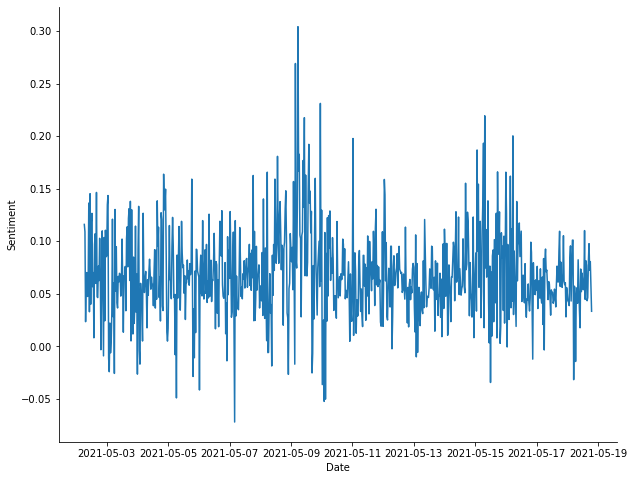

In [14]:
plt.figure(figsize=(10,8))
plt.plot(tesla2.sentiment)
plt.xlabel('Date'), plt.ylabel('Sentiment')
sns.despine(right=True, top=True)
plt.show()

In [15]:
tesla2 = tesla2.reset_index()

In [16]:
teslastock = pd.read_excel('Tesla Stock Prices.xlsx', header=1)

In [17]:
teslastock

,Time,2021/05/10,2021/05/11,2021/05/12,2021/05/13,2021/05/14
0,09:30:00,659.30,598.93,609.59,598.99,580.33
1,10:00:00,649.99,621.51,612.26,599.56,576.05
2,10:30:00,645.55,604.26,603.26,591.37,588.42
3,11:00:00,644.48,603.08,604.35,583.01,583.81
4,11:30:00,643.93,612.67,600.96,577.41,586.22
5,12:00:00,644.65,618.34,598.54,570.63,583.32
6,12:30:00,643.88,611.99,599.82,578.42,583.19
7,13:00:00,640.17,614.44,606.14,573.26,579.09
8,13:30:00,637.65,621.09,601.77,562.02,577.59
9,14:00:00,636.16,621.02,601.50,568.87,579.44


In [18]:
teslastock = pd.melt(teslastock, id_vars="Time")
teslastock = teslastock.rename(columns={'variable':'date', 'value':'price'})

In [19]:
teslastock['timestamp'] = teslastock.date.astype(str) + ' ' + teslastock.Time.astype(str)

In [20]:
teslastock.timestamp = pd.to_datetime(teslastock.timestamp)

In [21]:
teslastock = teslastock.drop(['Time', 'date'], axis=1)

In [22]:
teslastock

,price,timestamp
0,659.30,2021-05-10 09:30:00
1,649.99,2021-05-10 10:00:00
2,645.55,2021-05-10 10:30:00
3,644.48,2021-05-10 11:00:00
4,643.93,2021-05-10 11:30:00
...,...,...
65,579.44,2021-05-14 14:00:00
66,583.40,2021-05-14 14:30:00
67,586.69,2021-05-14 15:00:00
68,588.17,2021-05-14 15:30:00


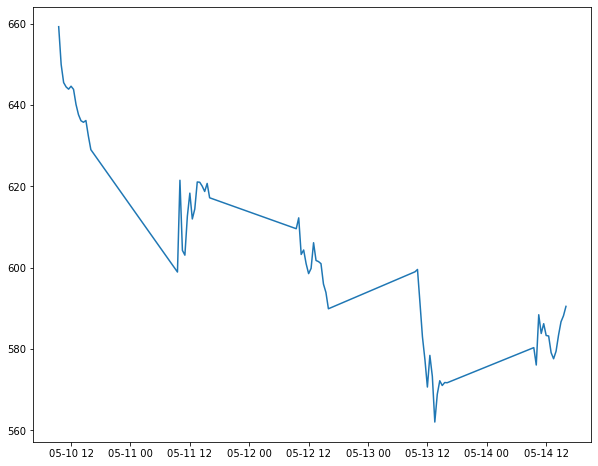

In [23]:
plt.figure(figsize=(10,8))
plt.plot(teslastock.timestamp, teslastock.price)
plt.show()

In [24]:
teslacombined = tesla2.merge(teslastock, on='timestamp')

In [25]:
teslacombined

,timestamp,sentiment,price
0,2021-05-10 09:30:00,0.034112,659.30
1,2021-05-10 10:00:00,0.040690,649.99
2,2021-05-10 10:30:00,0.048089,645.55
3,2021-05-10 11:00:00,0.041105,644.48
4,2021-05-10 11:30:00,0.026727,643.93
...,...,...,...
65,2021-05-14 14:00:00,0.057153,579.44
66,2021-05-14 14:30:00,0.102236,583.40
67,2021-05-14 15:00:00,0.070966,586.69
68,2021-05-14 15:30:00,0.056323,588.17


In [26]:
teslacombined['norm_sent'] = (teslacombined.sentiment-0.024828388180158086)/(0.12299644945697574-0.024828388180158086)
teslacombined['norm_price'] = (teslacombined.price - 562.02)/(659.3-562.02)

In [27]:
teslacombined

,timestamp,sentiment,price,norm_sent,norm_price
0,2021-05-10 09:30:00,0.034112,659.30,0.094570,1.000000
1,2021-05-10 10:00:00,0.040690,649.99,0.161581,0.904297
2,2021-05-10 10:30:00,0.048089,645.55,0.236949,0.858655
3,2021-05-10 11:00:00,0.041105,644.48,0.165809,0.847656
4,2021-05-10 11:30:00,0.026727,643.93,0.019341,0.842002
...,...,...,...,...,...
65,2021-05-14 14:00:00,0.057153,579.44,0.329278,0.179071
66,2021-05-14 14:30:00,0.102236,583.40,0.788526,0.219778
67,2021-05-14 15:00:00,0.070966,586.69,0.469984,0.253598
68,2021-05-14 15:30:00,0.056323,588.17,0.320822,0.268812


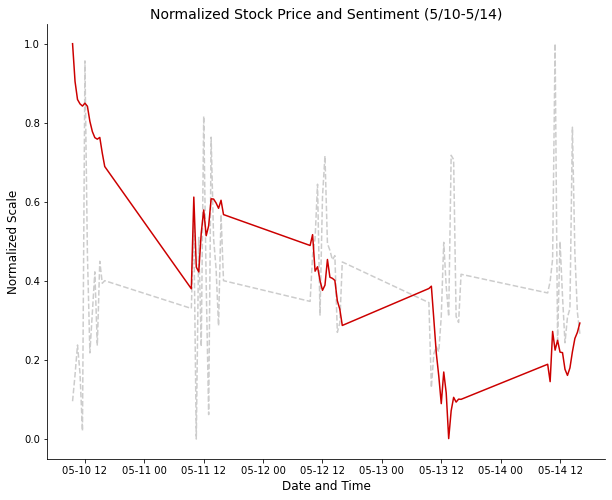

In [28]:
plt.figure(figsize=(10,8))
plt.plot(teslacombined.timestamp, teslacombined.norm_sent, color="#cccccc", linestyle = '--')
plt.plot(teslacombined.timestamp, teslacombined.norm_price, color='#cc0000')
sns.despine(top=True, right=True)
plt.xlabel('Date and Time', fontsize=12), plt.ylabel('Normalized Scale', fontsize=12)
plt.title('Normalized Stock Price and Sentiment (5/10-5/14)', fontsize=14)
plt.show()